# Classify Snippet Specificity using BERT

## About Our Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('3192antibody.xlsx')

In [3]:
df

,Row ID,Antibody?,Specificity?,PMID,PMCID,SNIPPET
0,10,"Diatheva, Dahl",negative,23390418,PMC3565217,The Diatheva and Dahl antibodies were two of t...
1,11,"Diatheva, Dahl",negative,23390418,PMC3565217,"For example, in the study of Panx1 knockout mi..."
2,12,"Diatheva, Dahl",negative,23390418,PMC3565217,(2011) where in situ hybridization images of P...
3,13,no,neutral,23390418,PMC3565217,Because Western blots are frequently treated a...
4,14,no,neutral,23390418,PMC3565217,Because Western blots are frequently treated a...
...,...,...,...,...,...,...
3187,22294,NaN,NaN,28781053,PMC6399476,We first determined the subcellular distributi...
3188,22301,NaN,NaN,30840898,PMC6410498,"Next, the lysates were centrifuged (1,000x g, ..."
3189,22353,the antibody,neutral,30638865,PMC6413675,"After antigen retrieval was performed, the end..."
3190,22357,n,NaN,30638865,PMC6413675,Crosslinked protein&#8211;DNA complexes were i...


### How many specificity class right now?

In [4]:
import matplotlib.pyplot as plt

In [5]:
list_values = []

In [6]:
for value in df['Specificity?']:
    if pd.isna(value) == False:
        v = value.strip('\n')
        v = v.strip()
        list_values.append(v)

In [22]:
specificity_classes = dict()
count_record = 0

In [23]:
for l in list_values:
    specificity_classes[l] = specificity_classes.get(l, 0) + 1
    count_record += 1

In [24]:
specificity_classes

{'negative': 63,
 'neutral': 147,
 'unsure': 45,
 'positive': 672,
 'na': 12,
 '(positive) claim': 3,
 'claim': 19,
 'unsure (positive and negative)': 1,
 'positive and negative': 4,
 'claim (positive)': 2,
 'positive, claim': 40,
 'postive': 3,
 'positive, neutral': 1,
 'claim, positive': 1,
 'netural ??': 1,
 '(positive) "snippet isnt enough to know what': 1,
 'antibody pennetration method': 1,
 'unsure (snippet not enough need more)': 1,
 'not sure': 10,
 'nonspecific (2)  positive': 2,
 'nonspecific': 5,
 'N/A': 3,
 'positive (2) neutral': 1,
 'Rabbit Anti-Mouse IgG- positive': 1,
 'unspecific': 1,
 'negative, neutral': 1,
 'nonspecfic': 1,
 'positive (2) N/A': 2,
 'postiive': 2,
 'positive?': 2,
 'Claim +ve': 3,
 'Positive': 1,
 'claim positive': 48,
 'neutral(2) claim positive': 1,
 'positve': 2,
 'N/A, positive': 3,
 'unsure, positive': 1,
 'N/A, negative': 2,
 'positive,': 1,
 'specific not sensitive': 2,
 'positive,claim positive(2)': 2,
 'netural': 1}

In [25]:
count_record

1115

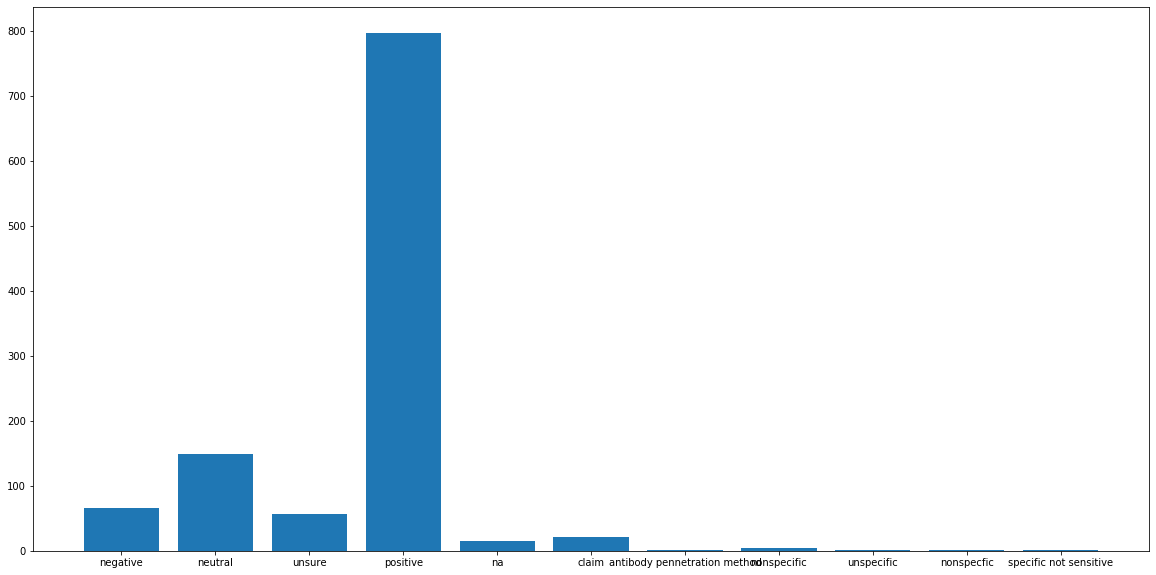

In [11]:
plt.figure(figsize=(20,10))
plt.bar(list(specificity_classes.keys()), specificity_classes.values())
plt.show()